In [36]:
data <- read.csv("/content/birds.csv")

In [37]:
head(data)
str(data)

,X,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>
1,1,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
2,2,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
3,3,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
4,4,Adelie,Torgersen,NA,NA,NA,NA,NA,2007
5,5,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
6,6,Adelie,Torgersen,39.3,20.6,190,3650,male,2007


'data.frame':	344 obs. of  9 variables:
 $ X                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ species          : chr  "Adelie" "Adelie" "Adelie" "Adelie" ...
 $ island           : chr  "Torgersen" "Torgersen" "Torgersen" "Torgersen" ...
 $ bill_length_mm   : num  39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ bill_depth_mm    : num  18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int  181 186 195 NA 193 190 181 195 193 190 ...
 $ body_mass_g      : int  3750 3800 3250 NA 3450 3650 3625 4675 3475 4250 ...
 $ sex              : chr  "male" "female" "female" NA ...
 $ year             : int  2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...


In [38]:
dataf <- na.omit(data[, c("bill_length_mm", "flipper_length_mm")])

median_bill_length <- median(dataf$bill_length_mm, na.rm = TRUE)
median_flipper_length <- median(dataf$flipper_length_mm, na.rm = TRUE)

cat("Median bill length:", median_bill_length, "\n")
cat("Median flipper length:", median_flipper_length)

Median bill length: 44.45 
Median flipper length: 197

In [39]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [41]:
data_filtered <- na.omit(data)

mean_bill_length <- aggregate(bill_length_mm ~ year, data_filtered, FUN = mean)
mean_flipper_length <- aggregate(flipper_length_mm ~ year, data_filtered, FUN = mean)

mean_bill_length <- arrange(mean_bill_length, year)
mean_flipper_length <- arrange(mean_flipper_length, year)

increasing_bill_length <- all(diff(mean_bill_length$bill_length) > 0)[-1]
increasing_flipper_length <- all(diff(mean_flipper_length$flipper_length) > 0)[-1]

print(increasing_bill_length)
print(increasing_flipper_length)

logical(0)
logical(0)


In [42]:
library(ggplot2)

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


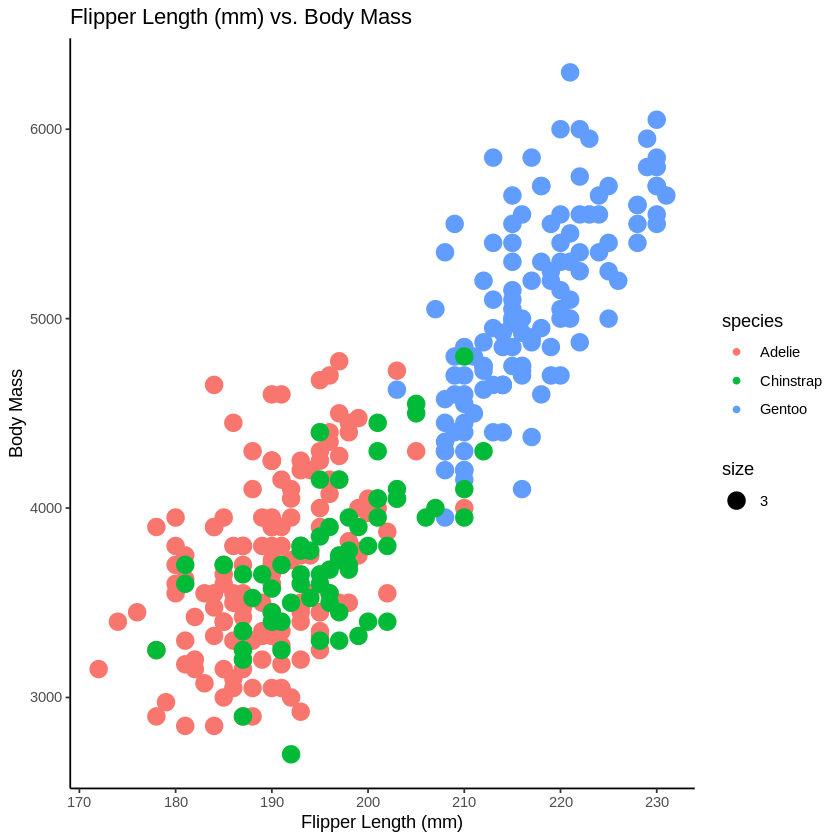

In [43]:
ggplot(data, aes(x = flipper_length_mm, y = body_mass_g, color = species)) +
  geom_point(aes(size = 3)) +
  labs(title = "Flipper Length (mm) vs. Body Mass", x = "Flipper Length (mm)", y = "Body Mass") +
  theme_classic()